# **Credit Card Dataset for Clustering**

**About Dataset**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases 
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

Kaggle link: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [2]:
#memanggil dataset
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clustering/CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# **Data Cleaning**

In [3]:
#melihat tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Terlebih dahulu dilakukan checking missing value terhadap dataset yang digunakan. Apabila terdapat missing value dengan jumlah yang sedikit maka akan dilakukan pembuangan row data yang memiliki missing value tersebut.

In [4]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
#missing value dibuang

data1=data.dropna()
data1.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Selanjutnya akan dilakukan seleksi kolom. Kolom CUST_ID pada kali ini tidak diperlukan untuk pengolahan data sehingga akan dibuang.

In [6]:
cust_id=data1.CUST_ID
data2=data1.drop(['CUST_ID'],axis=1)
data2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# **EDA**

In [7]:
#visualisasi
import matplotlib.pyplot as plt

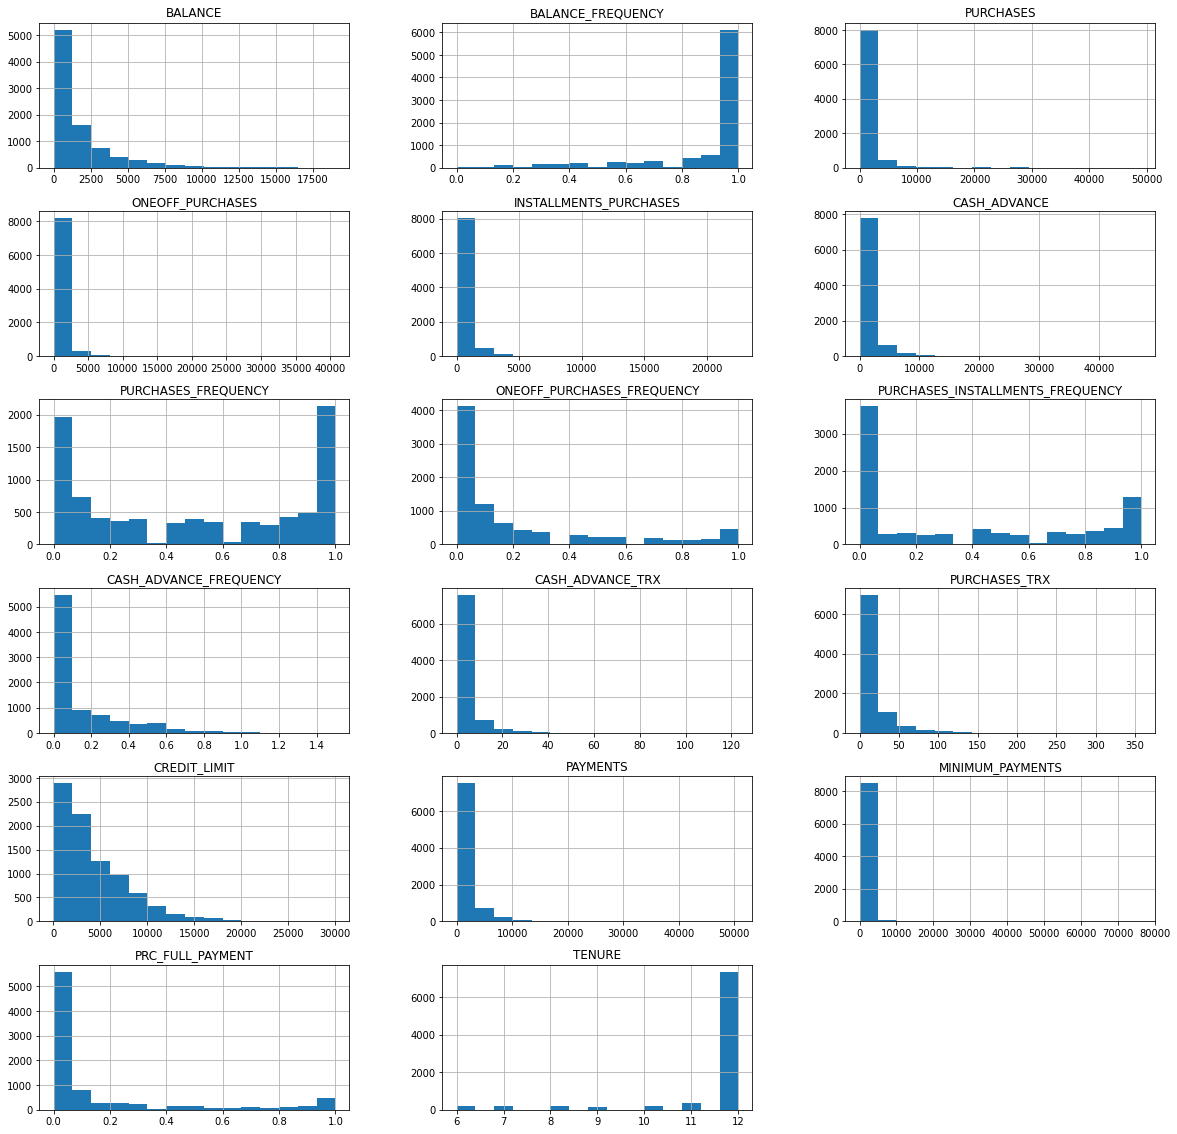

In [8]:
numerical_features=[feature for feature in data2.columns if data2[feature].dtypes!='object']

data2[numerical_features].hist(bins=15, figsize=(20, 20), layout=(6, 3));

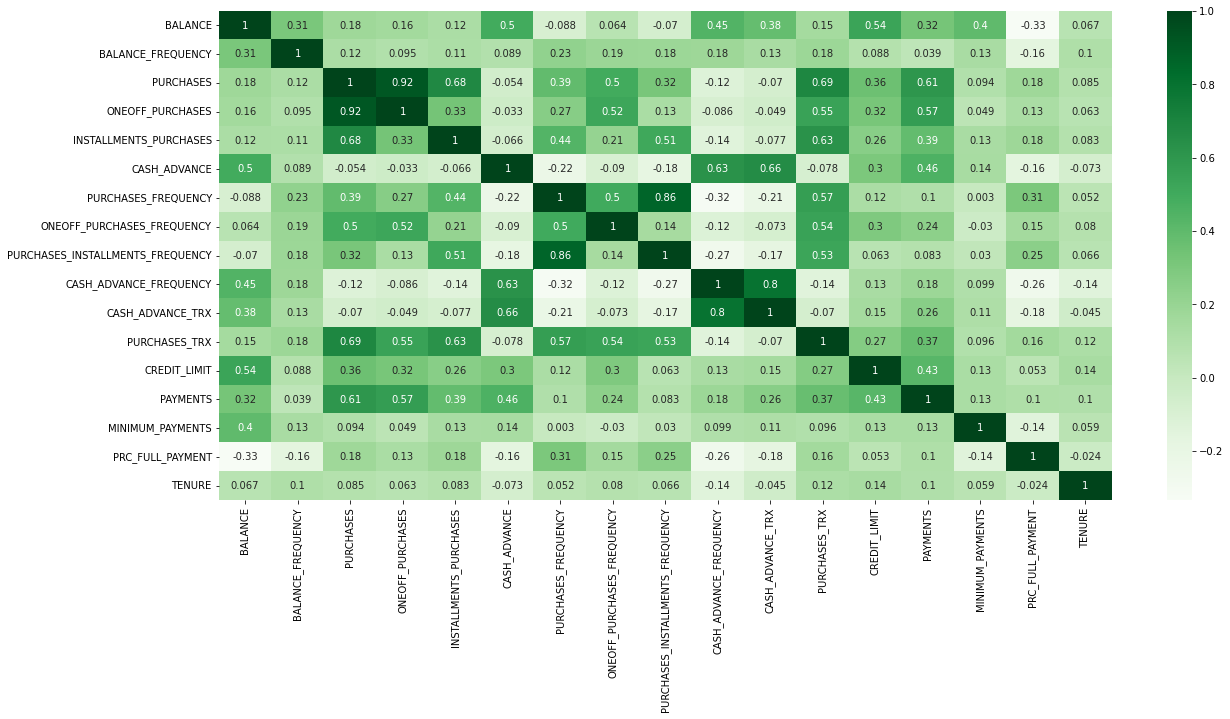

In [9]:
#matrix korelasi

import seaborn as sns

plt.figure(figsize=(20,9))
sns.heatmap(data2.corr(),cmap="Greens",annot=True)

# **Clustering**

Sebelum dilakukan clustering, terlebih dahulu akan dilakukan standardisasi data. Lalu kemudian checking asumsi dan penanganannya jika ada asumsi yang tidak terpenuhi.

In [10]:
#standardisasi data 
import scipy.stats as stats

#membuat variabel z-score
z=stats.zscore(data2)
z

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
4,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
5,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8945,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8947,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8948,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


Langkah selanjutnya adalah melakukan checking asumsi terhadap dataset yang digunakan. Asumsi yang harus terpenuhi ada dua, yaitu:


*   Representativeness of the sample (sampel mewakili populasi)

  Uji ini dapat dicek dengan Kaiser-Meyer Olkin (KMO Test). Nilai KMO > 0.5 menandakan bahwa sampel (data objek ataupun variabel indikator) cukup untuk clustering. Apabila asumsi ini tidak terpenuhi maka dapat dilakukan pemilihan ulang variabel atau penambahan variabel.
*   Non multikolinieritas

  Uji ini dapat dicek dengan Bartlett Sphericity Test. Nilai p-value > 0.05 (taraf signifikansi) menndakan bahwa asumsi terpenuhi. Apabila asumsi non multikolinieritas tidak terpenuhi maka dapat ditangani dengan menggunakan PCA.



In [11]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 515 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 10.9 MB/s 
     |████████████████████████████████| 98 kB 3.1 MB/s 
     |████████████████████████████████| 8.8 MB 66.5 MB/s 
     |████████████████████████████████| 468 kB 55.6 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=628f88ad9b4483d1526c9a573bb2d42d0ae25a6ae6fefc2528b60003775421af
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [12]:
#Uji representativeness of the sample

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_model = calculate_kmo(z)
print(kmo_model)

(array([0.71004406, 0.75248572, 0.59098388, 0.51280527, 0.47234065,
       0.78263332, 0.59655219, 0.52556338, 0.53963354, 0.74569542,
       0.73212605, 0.86905282, 0.75349632, 0.84740765, 0.66241326,
       0.7822567 , 0.47769726]), 0.640893239542122)


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:245: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  "The inverse of the variance-covariance matrix "


Dikarenakan nilai dari KMO Test = 0.640893239542122 > 0.5 maka asumsi representativeness of the sample telah terpenuhi.

In [13]:
#Uji non multikolinieritas
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

p = calculate_bartlett_sphericity(z)
print(p)

(168066.75044498834, 0.0)


Dikarenakan nilai p-value = 0.0 < 0.05 maka asumsi non multikolinieritas tidak terpenuhi sehingga akan ditangani menggunakan PCA.

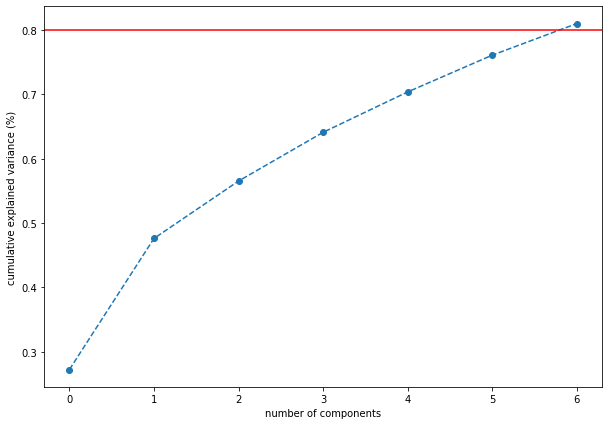

In [14]:
#PCA
from sklearn.decomposition import PCA
import numpy as np

batas=0.80
pca = PCA(n_components=batas).fit(z)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),linestyle='--',marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance (%)')
plt.axhline(y=batas, color='red', linestyle='-')

Setelah dilakukan PCA, diperoleh bahwa sejumlah 7 komponen utama sudah mampu menjelaskan > 80% variance data-data di variabel asli sehingga akan digunakan 7 komponen utama. (0.0 pada gambar menunjukkan komponen ke-1 sehingga 6.0 menunjukkan komponen ke-7)

In [15]:
#Variabel Komponen Utama (7 Komponen Utama)

data_pca=PCA(n_components=7).fit_transform(z)
data1_pca=pd.DataFrame(data=data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data1_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893
...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810


Setelah semua asumi terpenuhi maka dapat dilanjutkan ke tahap clustering. Pada kali ini akan digunakan K-Means Clustering untuk mengelompokkan objeknya.

In [16]:
#KMeans
from sklearn.cluster import KMeans 

#visualisasi
import matplotlib.pyplot as plt

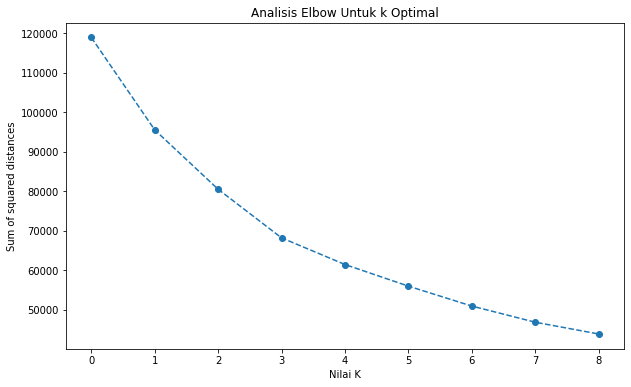

In [17]:
#Elbow
Sum_of_squared_distances=[]

range_values=range(1,10)
for i in range_values:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data1_pca)
    Sum_of_squared_distances.append(kmean.inertia_)

plt.figure(figsize=(10,6))    
plt.plot(Sum_of_squared_distances,linestyle='--',marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Sum of squared distances')
plt.title('Analisis Elbow Untuk k Optimal')
plt.show()

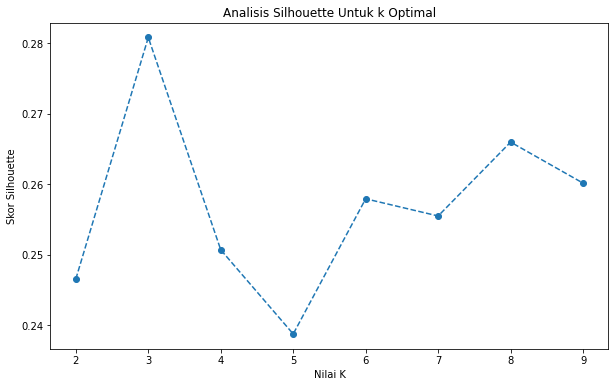

In [18]:
#Silhouette
from sklearn.metrics import silhouette_score

silhouette_avg=[]

range_values=range(2,10)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data1_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data1_pca, cluster_labels))

plt.figure(figsize=(10,6)) 
plt.plot(range_values,silhouette_avg,linestyle='--',marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Skor Silhouette')
plt.title('Analisis Silhouette Untuk k Optimal')
plt.show()

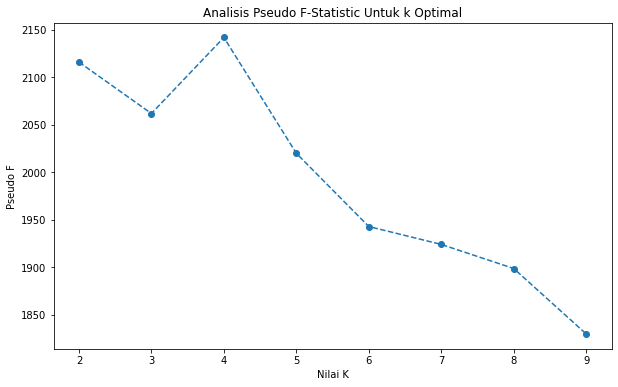

In [19]:
from sklearn.metrics import calinski_harabasz_score

pseudo_f=[]

range_values=range(2,10)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data1_pca)
    cluster_labels = kmeans.labels_
    pseudo_f.append(calinski_harabasz_score(data1_pca, cluster_labels))
  

plt.figure(figsize=(10,6)) 
plt.plot(range_values,pseudo_f,linestyle='--',marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Pseudo F')
plt.title('Analisis Pseudo F-Statistic Untuk k Optimal')
plt.show()

Berikut jumlah cluster optimal pada masing-masing metode:


*   Elbow: 4 Cluster (point 3.0 menujukkan k = 4, berdasarkan grafik bentuk siku dan nilainya sudah mulai melandai)
*   Silhouette: 3 Cluster (berdasarkan nilai silhouette tertinggi)
* Pseudo F-Statistic: 4 Cluster (berdasarkan nilai Pseudo F tertinggi)

Berdasarkan hasil penentuan jumlah cluster optimal di atas, akan diputuskan untuk mengambil cluster optimal dengan jumlah 4 cluster.



In [20]:
#K-Means Clustering
kmeans= KMeans(4).fit(data1_pca)

#Output labels
label=kmeans.labels_

In [21]:
#menggabungkan hasil clustering
df_cluster=pd.concat([data2.reset_index(),pd.DataFrame({'cluster':label})],axis=1)
df_cluster1=df_cluster.drop(['index'],axis=1)
df_cluster1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,3
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


In [22]:
#CUST_ID dan Cluster
ID_cluster=pd.concat([cust_id.reset_index(),pd.DataFrame({'cluster':label})],axis=1)
ID_cluster=ID_cluster.drop(['index'],axis=1)
ID_cluster

,CUST_ID,cluster
0,C10001,3
1,C10002,0
2,C10003,1
3,C10005,3
4,C10006,1
...,...,...
8631,C19184,3
8632,C19186,1
8633,C19188,1
8634,C19189,3


Tabel di atas menunjukkan hasil k-means clustering dengan 4 cluster dari data Credit Card. (0 menunjukkan cluster 1, 1 menujukkan cluster 2, dan seterusnya)

In [23]:
#menghitung rata-rata per cluster
import statistics

df_cluster1.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,4621.203308,0.969096,516.336183,324.149129,192.273877,4572.893030,0.291264,0.140090,0.189309,0.485967,14.409906,7.929974,7615.674249,3584.465746,2006.563740,0.036455,11.380017
1,990.778467,0.953119,1418.195477,710.202489,708.182571,222.643152,0.898627,0.324157,0.725638,0.044075,0.825440,24.833940,4466.399591,1494.245892,654.826907,0.278291,11.629326
2,4103.123637,0.983756,9589.298411,6457.247713,3134.376279,787.038250,0.941414,0.754892,0.780614,0.075904,2.453488,101.286822,10526.744186,9208.348429,2509.291664,0.300735,11.957364
3,1046.388687,0.818126,282.505081,214.406665,68.446095,586.353097,0.188966,0.089866,0.095017,0.116155,2.144902,3.221569,3247.279155,1000.650042,590.353761,0.086577,11.472783


Tabel di atas merupakan rata-rata indikator dari tiap cluster. 